# Introduction 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import SVC

# Linear kernel 

In [2]:
data_1 = loadmat('Data/ex6data1.mat')
X1 = data_1['X']
y1 = data_1['y'].flatten()

In [3]:
def plot_2D_data(X, y):
    plt.figure(figsize= (8, 6))
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'magma_r', s = 120, \
                edgecolors = 'k', linewidths = 0.7)

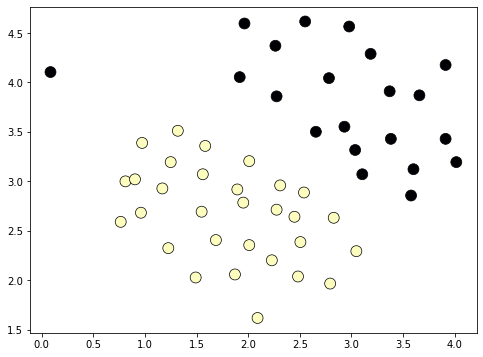

In [4]:
plot_2D_data(X1, y1)

In [5]:
# fit the model
clf = SVC(kernel = 'linear', C = 1)
clf.fit(X1, y1)
clf.score(X1, y1)

0.9803921568627451

In [6]:
def plot_decision_boundary(clf, X, y):
    
    plot_2D_data(X, y)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xgrid = np.linspace(xlim[0], xlim[1], 30)
    ygrid = np.linspace(ylim[0], ylim[1], 30)

    xgrid, ygrid = np.meshgrid(xgrid, ygrid)
    xygrid = np.vstack([xgrid.ravel(), ygrid.ravel()]).T
    preds = clf.decision_function(xygrid).reshape(xgrid.shape)

    # plot decision boundary and margins
    ax.contour(xgrid, ygrid, preds, colors = 'b', levels = 0)
    plt.title('Linear decision boundary with C = 1', size = 15)

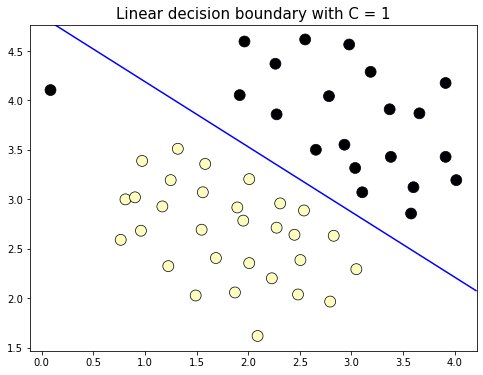

In [7]:
plot_decision_boundary(clf, X1, y1)

In [8]:
# fit the model
clf = SVC(kernel = 'linear', C = 100)
clf.fit(X1, y1)
clf.score(X1, y1)

1.0

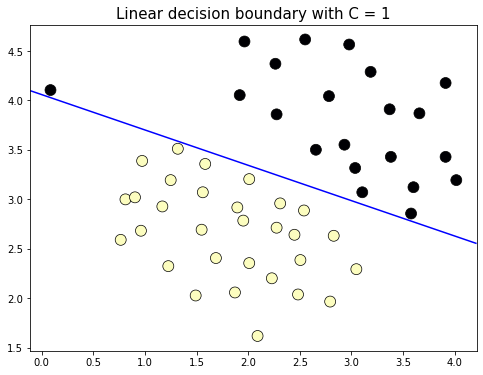

In [9]:
plot_decision_boundary(clf, X1, y1)

# Custom linear kernel
  
### $ K(x, x') = \left< x, x' \right> $

In [10]:
def linear_kernel(X, Y):
    return np.dot(X, Y.T)

# fit the model
clf = SVC(kernel = linear_kernel)
clf.fit(X1, y1)
clf.score(X1, y1)

0.9803921568627451

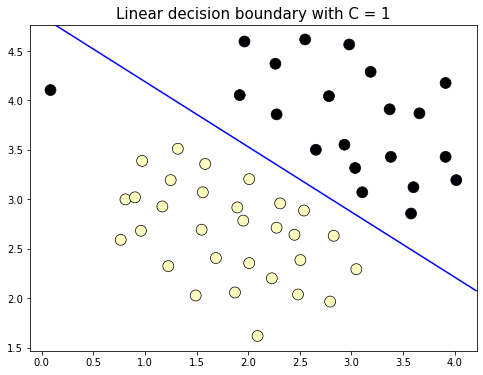

In [11]:
plot_decision_boundary(clf, X1, y1)

# Gaussian Kernel 

#### Gaussian kernel:  
### $ K(x, x') = \exp\left( - \frac{\sum_{i = 1}^{n} (x - x')^2}{2 \sigma ^2} \right) $

In [12]:
def gaussian_kernel(X, Y, sigma=0.5):
    gram_matrix = np.zeros((X.shape[0], Y.shape[0]))
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            x = x.flatten()
            y = y.flatten()
            gram_matrix[i, j] = np.exp(- np.sum((x-y)**2))/(2 * sigma**2)
    return gram_matrix

In [13]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])

gaussian_kernel(x1, x2)

array([[7.35758882e-01, 2.46819608e-04, 3.66312778e-02],
       [3.66312778e-02, 3.66312778e-02, 2.46819608e-04],
       [7.35758882e-01, 2.46819608e-04, 3.66312778e-02]])

In [14]:
# fit the model
clf = SVC(kernel = gaussian_kernel)
clf.fit(X1, y1)
clf.score(X1, y1)

1.0

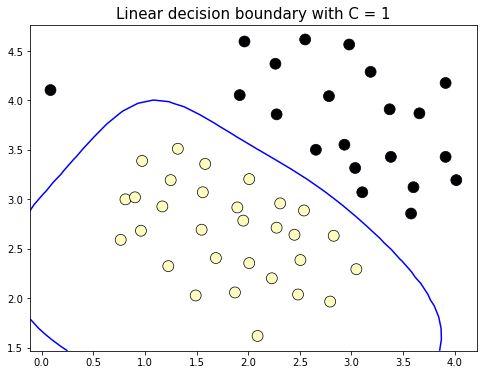

In [15]:
plot_decision_boundary(clf, X1, y1)

# Non linear boundary 

Scikit learn has the default kernel called radial basis function or RBF for short. 

### $ K(x,x') = \exp(-\gamma || x - x' ||^2  )) $

Identifying $ \gamma = \frac{1}{2 \sigma^2} $, we can see that this is gaussian kernel. 

In [16]:
data_2 = loadmat('Data/ex6data2.mat')
X2 = data_2['X']
y2 = data_2['y'].flatten()

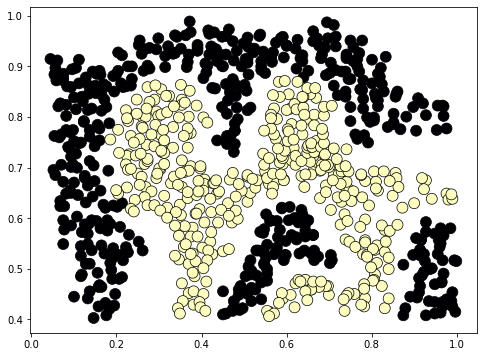

In [17]:
plot_2D_data(X2, y2)

In [18]:
# fit the model
clf = SVC(kernel = 'rbf', C = 50,  gamma = 20)
clf.fit(X2, y2)
clf.score(X2, y2)

0.9907300115874855

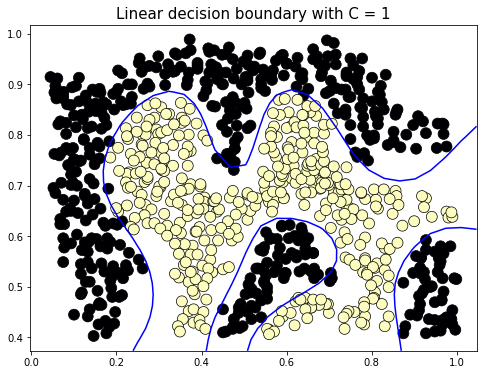

In [19]:
plot_decision_boundary(clf, X2, y2)

# Custom non linear kernel 

#### Polynomial kernel:  
### $ K(x, x') = \left(\gamma \left<x, x' \right> + r\right)^d $

In [20]:
def my_kernel(X, Y):
    return np.power(2 * np.dot(X, Y.T) + 5, 6)

# fit the model
clf = SVC(kernel = my_kernel)
clf.fit(X2, y2)
clf.score(X2, y2)

0.8980301274623407

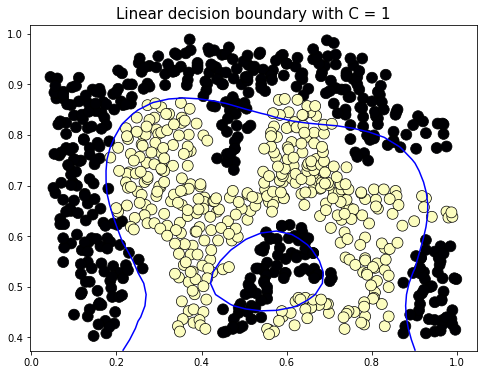

In [21]:
plot_decision_boundary(clf, X2, y2)

# Large overlap 

Here the dataset have large number of data point in the wrong side of the decision boundary. 

In [22]:
data_3 = loadmat('Data/ex6data3.mat')
X3 = data_3['X']
y3 = data_3['y'].flatten()

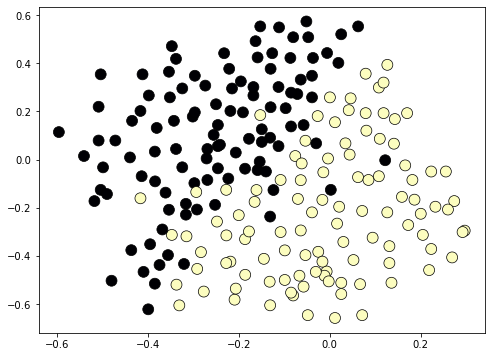

In [23]:
plot_2D_data(X3, y3)

In [24]:
# fit the model
clf = SVC(kernel = 'rbf', C = 5,  gamma = 25)
clf.fit(X3, y3)
clf.score(X3, y3)

0.943127962085308

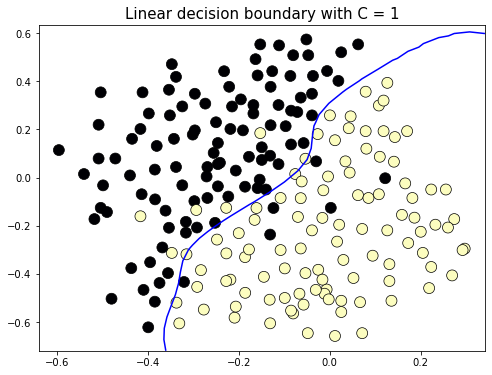

In [25]:
plot_decision_boundary(clf, X3, y3)